<a href="https://colab.research.google.com/github/skimaza/assist/blob/main/perceptron_iris_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 전략경영MBA 경영자를 위한 딥러닝 원리의 이해
# Perceptron 실습 예제
# 붓꽃 분류 잘 안되는 경우

The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import os
from urllib.request import urlopen

IRIS_DATA = "iris.dat"
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [ ]:
df = pd.read_csv(IRIS_DATA, header=None)

In [ ]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

In [ ]:


pos = X2[[y2 == 1]]
neg = X2[[y2 == -1]]

min_x = min(X2[:,0])
max_x = max(X2[:,0])
print(min_x, max_x)


2.0 3.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


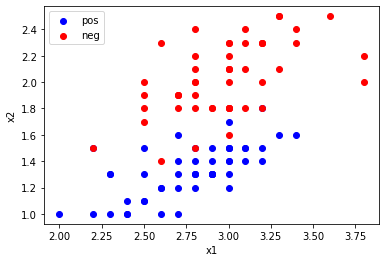

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

In [ ]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi))
            print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                #errors += int(update != 0.0)
                errors += 1
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def predict(X):
    return np.where(net_input(X) >= 0.0, 1, -1)

In [ ]:
train(X2, y2, epochs=3, eta=0.01)

Initial weights [0. 0. 0.]
EPOCHS 1
[3.2 1.4] target 1 sum 0.0 update 0.0
[3.2 1.5] target 1 sum 0.0 update 0.0
[3.1 1.5] target 1 sum 0.0 update 0.0
[2.3 1.3] target 1 sum 0.0 update 0.0
[2.8 1.5] target 1 sum 0.0 update 0.0
[2.8 1.3] target 1 sum 0.0 update 0.0
[3.3 1.6] target 1 sum 0.0 update 0.0
[2.4 1. ] target 1 sum 0.0 update 0.0
[2.9 1.3] target 1 sum 0.0 update 0.0
[2.7 1.4] target 1 sum 0.0 update 0.0
[2. 1.] target 1 sum 0.0 update 0.0
[3.  1.5] target 1 sum 0.0 update 0.0
[2.2 1. ] target 1 sum 0.0 update 0.0
[2.9 1.4] target 1 sum 0.0 update 0.0
[2.9 1.3] target 1 sum 0.0 update 0.0
[3.1 1.4] target 1 sum 0.0 update 0.0
[3.  1.5] target 1 sum 0.0 update 0.0
[2.7 1. ] target 1 sum 0.0 update 0.0
[2.2 1.5] target 1 sum 0.0 update 0.0
[2.5 1.1] target 1 sum 0.0 update 0.0
[3.2 1.8] target 1 sum 0.0 update 0.0
[2.8 1.3] target 1 sum 0.0 update 0.0
[2.5 1.5] target 1 sum 0.0 update 0.0
[2.8 1.2] target 1 sum 0.0 update 0.0
[2.9 1.3] target 1 sum 0.0 update 0.0
[3.  1.4] target

In [ ]:
2.7*(-0.066) + 1.9*(-0.05)-0.02

-0.2932

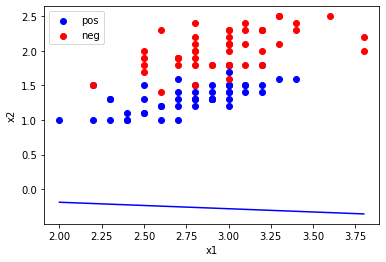

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

In [ ]:
errors_log

[1, 3, 2]

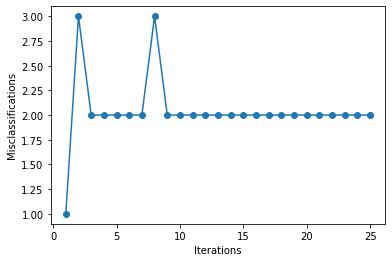

In [ ]:
plt.plot(range(1, len(errors_log)+1), errors_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [ ]:
print(errors_log)

[1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
print('Total number of misclassifications: %d of 100' % (y2 != predict(X2)).sum())

Total number of misclassifications: 43 of 100


In [ ]:
train(X2, y2, epochs=50, eta=0.01)

Initial weights [0. 0. 0.]
EPOCHS 1
Updated WEIGHTS [-0.02  -0.066 -0.05 ]
EPOCHS 2
Updated WEIGHTS [ 0.    -0.002 -0.022]
Updated WEIGHTS [0.02  0.062 0.008]
Updated WEIGHTS [ 0.    -0.004 -0.042]
EPOCHS 3
Updated WEIGHTS [ 0.02   0.06  -0.014]
Updated WEIGHTS [ 0.    -0.006 -0.064]
EPOCHS 4
Updated WEIGHTS [ 0.02   0.058 -0.036]
Updated WEIGHTS [ 0.    -0.008 -0.086]
EPOCHS 5
Updated WEIGHTS [ 0.02   0.056 -0.058]
Updated WEIGHTS [ 0.    -0.01  -0.108]
EPOCHS 6
Updated WEIGHTS [ 0.02   0.054 -0.08 ]
Updated WEIGHTS [ 0.00000000e+00 -1.38777878e-17 -1.18000000e-01]
EPOCHS 7
Updated WEIGHTS [ 0.02   0.064 -0.09 ]
Updated WEIGHTS [ 0.    -0.002 -0.14 ]
EPOCHS 8
Updated WEIGHTS [ 0.02   0.062 -0.112]
Updated WEIGHTS [ 0.04   0.106 -0.082]
Updated WEIGHTS [ 0.02   0.04  -0.132]
EPOCHS 9
Updated WEIGHTS [ 0.04   0.104 -0.104]
Updated WEIGHTS [ 0.02   0.038 -0.154]
EPOCHS 10
Updated WEIGHTS [ 0.04   0.102 -0.126]
Updated WEIGHTS [ 0.02   0.036 -0.176]
EPOCHS 11
Updated WEIGHTS [ 0.04   0.1 

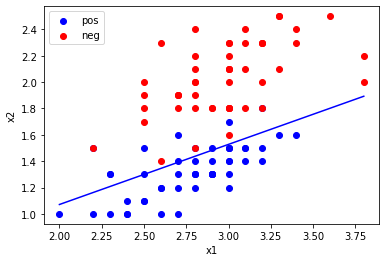

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

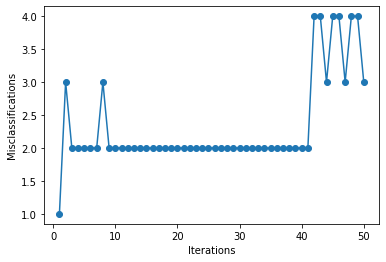

In [ ]:
plt.plot(range(1, len(errors_log)+1), errors_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()